# Clustering Jerárquico

Como funciona:

Este método lo que hace es agrupar construyendo jerarquías de uniones. Tiene dos enfoques:

- Aglomerativo (bottom-up) parte de que cada punto es en si mismo un cluster, va revisando de a pares los que tengan similitudes y agrupa.

- Divisivo (top-down) parte de que todos están en un mismo cluster y va buscando diferencias para poder ir separando. El criterio de parada es alcanzar un número de cluster objetivo.

Posee una ventaja y es que tiene una representacion visual llamada dendrograma.

Los diferentes tipos de uniones para realizar el bottom-up son:

- single : Mínima distancia entre los clusters
- complete : Máxima distancia entre los clusters
- average : Promedio de todas las distancias entre clusters
- ward : Aumento de varianza al unir (solo euclideana)

Carguemos las librerías necesarias para implementar el modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

Carguemos el dataset a utilizar.

Este dataset viene con etiquetas de resultados. Como este metodo es no supervisado no lo utilizaremos para la realizacion del mismo, sino que lo usaremos para la visualizacion.

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

Preprocesamiento

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

Construyamos el dendrograma, visualización de este modelo.

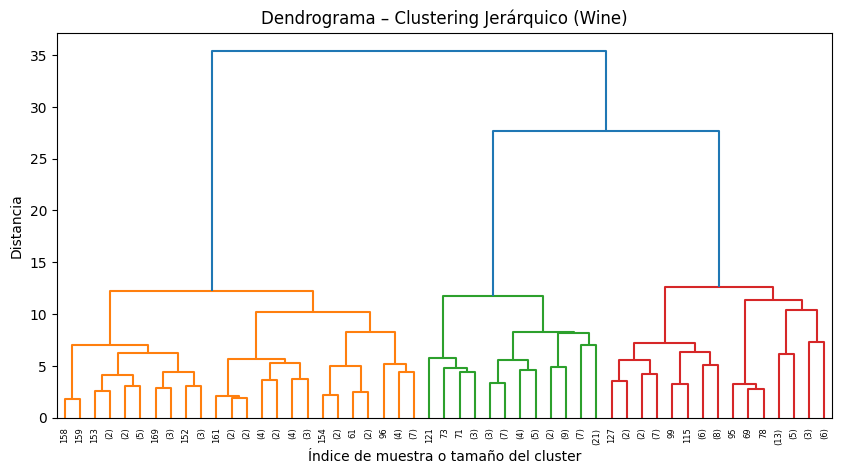

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Dendrograma – Clustering Jerárquico (Wine)")
linked = linkage(X_scaled, method='ward') # Tipo de union
dendrogram(linked, truncate_mode='level', p=5) # Visualizacion
# truncate_mode = 'level' con p = 5 lo que hace es truncar el dendrograma
# considerando las ultimas p = 5 uniones antes de la union del cluster total
plt.xlabel("Índice de muestra o tamaño del cluster")
plt.ylabel("Distancia")
plt.show()

Ahora visualizaremos los datos pero en 2D. Agglomerative Clustering es el método de sklearn que aplica el clustering jerarquico.

Construyamos el pipeline del modelo.

In [ ]:
hierarchical_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('hierarchical', AgglomerativeClustering(n_clusters=3))
])

In [ ]:
hierarchical_labels = hierarchical_pipe.fit_predict(X)

Veamos las etiquetas de las clases predecidas por el modelo.

In [ ]:
hierarchical_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
X.shape

(178, 13)

Notemos que el dataset tiene 13 variables por lo que haremos una reduccion de dimensionalidad por PCA para visualizar.

In [ ]:
X_reduced = PCA(n_components=2).fit_transform(X_scaled)

Lo que haremos es tomar la reduccion de los datos y para visualizarlos en clusters le damos como colores las diferentes etiquetas obtenidas por el método.

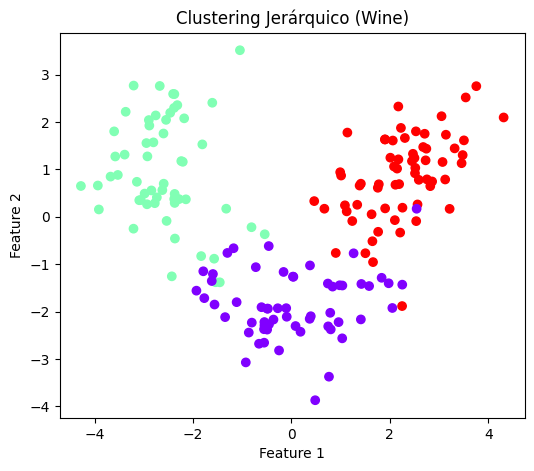

In [ ]:
plt.figure(figsize=(6,5))
plt.title("Clustering Jerárquico (Wine)")

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()